LINK TO TRAINING DATA: https://paperswithcode.com/dataset/conll-2003

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix

Mount drive to colab for data access

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Preview of training dataset

In [10]:
data = pd.read_csv('/content/drive/MyDrive/ner/train.txt', encoding= 'unicode_escape',sep=" ",header=None, names=["Token", "POS","Phrase","NER"])
data.head()

,Token,POS,Phrase,NER
0,EU,NNP,B-NP,B-ORG
1,rejects,VBZ,B-VP,O
2,German,JJ,B-NP,B-MISC
3,call,NN,I-NP,O
4,to,TO,B-VP,O


This function loads data from two pickle files, features_file and target_file, converts them into lists, and returns them as embeddings and tags respectively.

In [2]:
def load_data(features_file, target_file):
  df = pd.read_pickle(features_file)
  embeddings = df.values.tolist()
  # embeddings = torch.from_numpy(array)
  df = pd.read_pickle(target_file)
  # array = df.to_numpy()
  tags = df.values.tolist()
  print("Loading data from files: %s, %s" % (features_file, target_file))
  return embeddings,tags

Loading Train, Test and Val data

In [7]:
X_train, y_train = load_data("/content/drive/MyDrive/ner/train_x.pkl",  "/content/drive/MyDrive/ner/train_y.pkl")
X_val, y_val = load_data("/content/drive/MyDrive/ner/val_x.pkl",  "/content/drive/MyDrive/ner/val_y.pkl")
X_test, y_test = load_data("/content/drive/MyDrive/ner/test_x.pkl",  "/content/drive/MyDrive/ner/test_y.pkl")

Loading data from files: /content/drive/MyDrive/ner/train_x.pkl, /content/drive/MyDrive/ner/train_y.pkl
Loading data from files: /content/drive/MyDrive/ner/val_x.pkl, /content/drive/MyDrive/ner/val_y.pkl
Loading data from files: /content/drive/MyDrive/ner/test_x.pkl, /content/drive/MyDrive/ner/test_y.pkl


Converting data to Numpy array

In [11]:
X_train = np.array(X_train)

In [13]:
print(type(X_train))

<class 'numpy.ndarray'>


In [14]:
y_train = np.array(np.array([i for i in y_train]))

In [16]:
print(type(y_train))

<class 'numpy.ndarray'>


In [60]:
X_test=np.array(X_test)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

This code defines a Bidirectional LSTM neural network model using Keras. The model consists of two Bidirectional LSTM layers with dropout layers in between them, followed by a Dense layer for output. The model is compiled using the Adam optimizer and categorical cross-entropy loss function. Finally, the summary of the model architecture is printed.

In [24]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add a Bidirectional LSTM layer
input_dim = 300  # Input dimension
model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(None, input_dim)))  # Adjust input shape if needed
model.add(Dropout(0.2))  # Add dropout with a dropout rate of 0.5

# Add another Bidirectional LSTM layer with dropout
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))  # Add dropout with a dropout rate of 0.5
# Add a Dense layer for output
output_dim = 10  # Output dimension
model.add(Dense(output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirecti  (None, None, 256)         439296    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_3 (Bidirecti  (None, None, 256)         394240    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, None, 256)         0         
                                                                 
 dense_1 (Dense)             (None, None, 10)          2570      
                                                                 
Total params: 836106 (3.19 MB)
Trainable params: 83610

This code defines a ModelCheckpoint callback in Keras, which saves the model with the best validation accuracy during training to the specified filepath. The model is trained using the `fit()` method, with training and validation data (`X_train`, `y_train`, `X_test`, `y_test`), a batch size of 128, and 12 epochs. The ModelCheckpoint callback is passed to the `callbacks` parameter of the `fit()` method. During training, the callback monitors the validation accuracy and saves the model when an improvement is observed.

In [25]:
from keras.callbacks import ModelCheckpoint

# Define the filepath where the model will be saved
filepath = "/content/drive/MyDrive/ner/best_model.h5"

# Define a callback to save the model with the best validation accuracy
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1)

# Train the model with the checkpoint callback
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=12,
                    validation_data=(X_test, y_test),
                    callbacks=[checkpoint])

Epoch 1/12
537/539 [============================>.] - ETA: 0s - loss: 0.6476 - accuracy: 0.7931
Epoch 1: saving model to /content/drive/MyDrive/ner/best_model.h5
539/539 [==============================] - 29s 36ms/step - loss: 0.6474 - accuracy: 0.7931 - val_loss: 0.5662 - val_accuracy: 0.8096
Epoch 2/12


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


539/539 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.8496
Epoch 2: saving model to /content/drive/MyDrive/ner/best_model.h5
539/539 [==============================] - 20s 36ms/step - loss: 0.4423 - accuracy: 0.8496 - val_loss: 0.5476 - val_accuracy: 0.8165
Epoch 3/12
537/539 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8609
Epoch 3: saving model to /content/drive/MyDrive/ner/best_model.h5
539/539 [==============================] - 18s 34ms/step - loss: 0.4051 - accuracy: 0.8610 - val_loss: 0.5429 - val_accuracy: 0.8206
Epoch 4/12
538/539 [============================>.] - ETA: 0s - loss: 0.3786 - accuracy: 0.8693
Epoch 4: saving model to /content/drive/MyDrive/ner/best_model.h5
539/539 [==============================] - 20s 37ms/step - loss: 0.3786 - accuracy: 0.8693 - val_loss: 0.5422 - val_accuracy: 0.8223
Epoch 5/12
538/539 [============================>.] - ETA: 0s - loss: 0.3587 - accuracy: 0.8742
Epoch 5: saving model to /cont

This code evaluates the performance of a loaded Keras model on validation data (`X_val`, `y_val`). It first loads the saved model from the specified filepath. Then, it uses the loaded model to make predictions on the validation data (`X_val`). The predictions are converted to the appropriate format using `argmax`. Finally, it calculates the F1 score and accuracy score using the predicted labels and prints the F1 score.

In [26]:
from sklearn.metrics import f1_score,accuracy_score
from keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/ner/best_model.h5')

# Make predictions on the test data
y_pred = loaded_model.predict(X_val)

# Convert predicted labels to the appropriate format
y_pred_argmax = np.argmax(y_pred, axis=2)

# Calculate the F1 score
f1 = f1_score(y_val.argmax(axis=2).flatten(), y_pred_argmax.flatten(), average='weighted')
acc = accuracy_score(y_val.argmax(axis=2).flatten(), y_pred_argmax.flatten())
print("F1 score on test data:", f1)

540/540 [==============================] - 9s 10ms/step
F1 score on test data: 0.8703543155377128


This code calculates the confusion matrix (`cm`) using the true labels (`y_val`) and the predicted labels (`y_pred_argmax`) flattened to a 1D array.

In [28]:
cm= confusion_matrix(y_val.argmax(axis=2).flatten(), y_pred_argmax.flatten())
cm

array([[ 880,   59,   18,   26,  101,   99,   23,    3,   15],
       [  24, 9485,    4,    6,   12,   39,   17,   19,    5],
       [  15,   67, 1289,  368,   28,    8,    3,    1,    1],
       [  23,  170,  144,  896,   23,    7,    5,    4,    2],
       [ 117,   42,    5,   15, 1506,   28,   17,    0,   22],
       [  61,   52,   19,   20,   50,  367,   13,   12,   43],
       [  32,   55,   11,    3,   39,   12,  307,   17,    0],
       [  12,   35,    2,    9,    3,   10,   26,  159,    7],
       [   2,    9,    3,    8,   17,   20,    2,    8,  168]])

<Axes: >

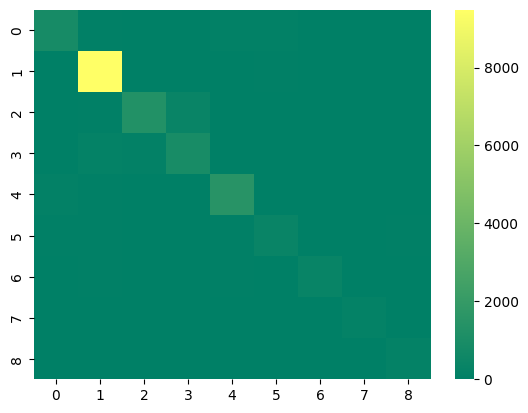

In [51]:
sns.heatmap(cm,cmap='summer')


This code imports the KeyedVectors class from the gensim library, allowing manipulation of word embeddings.

In [62]:
from gensim.models.keyedvectors import KeyedVectors

This function loads pre-trained Word2Vec word embeddings from a file using gensim's `KeyedVectors` class, and returns the loaded model. Then, it loads the Word2Vec embeddings from the specified file path into the variable `trained_model`.

In [63]:
def load_word_embeddings(embeddings_file_path):
    model = KeyedVectors.load_word2vec_format(embeddings_file_path, binary=True)
    return model

trained_model = load_word_embeddings("/content/drive/MyDrive/ner/GoogleNews-vectors-negative300.bin")

This function takes a list of numerical values representing a tag (e.g., predicted probabilities or scores) and converts it into a one-hot encoded format by setting the maximum value to 1 and all other values to 0.

In [68]:
def tagit(tag):
  i = tag.index(max(tag))
  tag = [0]*len(tag)
  tag[i] = 1
  return tag

This function predicts named entity recognition (NER) tags for each word in a given sentence using a provided NER model and a pre-trained word embedding model. It splits the input sentence into words, retrieves the word embeddings from the pre-trained model, predicts the NER tag using the provided NER model, and converts the prediction into a one-hot encoded format using the `tagit` function. Finally, it returns a list of predicted tags for each word in the sentence.

In [98]:
def predict_ner_tag(sentence, ner_model, trained_embed_model):
  tags=[]
  words=sentence.split(" ")
  for i in words:
    try:
      word=trained_embed_model[i]
    except:
      word=[0]*300
    tag=ner_model.predict(np.array([[word]]))
    tag=np.squeeze(tag).tolist()
    tag=tagit(tag)
    tags.append(tag)
  return tags

This function decodes a one-hot encoded NER tag by mapping the index of the '1' value back to the corresponding NER label using a predefined dictionary of NER labels. If the tag does not match any known NER label, it returns 'Non-Named entity'.

In [85]:
def decode_tag(tag):
  ner_labels = {'B-ORG': 0,
                'O': 1,
                'B-PER': 2,
                'I-PER': 3,
                'B-LOC': 4,
                'I-ORG': 5,
                'B-MISC': 6,
                'I-MISC': 7,
                'I-LOC': 8}

  i = tag.index(1)
  for k,v in ner_labels.items():
    if i==v:
      return k
  return 'Non-Named entity'

This function predicts named entity recognition (NER) tags for each word in a given sentence using the provided NER model and pre-trained word embedding model. It then decodes the predicted tags using the `decode_tag` function to obtain the corresponding NER labels. Finally, it returns a list of decoded NER labels for each word in the sentence.

In [72]:
def pred_ner(sentence, ner_model, trained_embed_model):
  tags=predict_ner_tag(sentence, ner_model, trained_embed_model)
  for i in range(len(tags)):
    tags[i] = decode_tag(tags[i])
  return tags

Example sentence

In [99]:
sentence = "Germany is under attack"
tags = pred_ner(sentence, model, trained_model)
print(tags)

1/1 [==============================] - 0s 104ms/step
['B-LOC', 'O', 'O', 'O']


Try it yourself!

These labels represent named entity recognition (NER) tags commonly used in natural language processing tasks, particularly in the context of entity recognition within text data. Here's what each label typically represents:

'B-ORG': Beginning of an organization entity.

'O': Outside of any named entity or non-entity.

'B-PER': Beginning of a person's name entity.

'I-PER': Inside a person's name entity (used for subsequent words in a person's name).

'B-LOC': Beginning of a location entity.

'I-ORG': Inside an organization entity (used for subsequent words in an organization's name).

'B-MISC': Beginning of a miscellaneous entity (anything not covered by the other categories).

'I-MISC': Inside a miscellaneous entity (used for subsequent words in a miscellaneous entity).

'I-LOC': Inside a location entity (used for subsequent words in a location).

In [104]:
sentence = input("Enter Sentence: ")
tags = pred_ner(sentence, model, trained_model)
print(tags)

Enter Sentence: Mr. Armand Smith did a great job
1/1 [==============================] - 0s 27ms/step
['O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O']
